Listening...
You said: good evening welcome to team earth


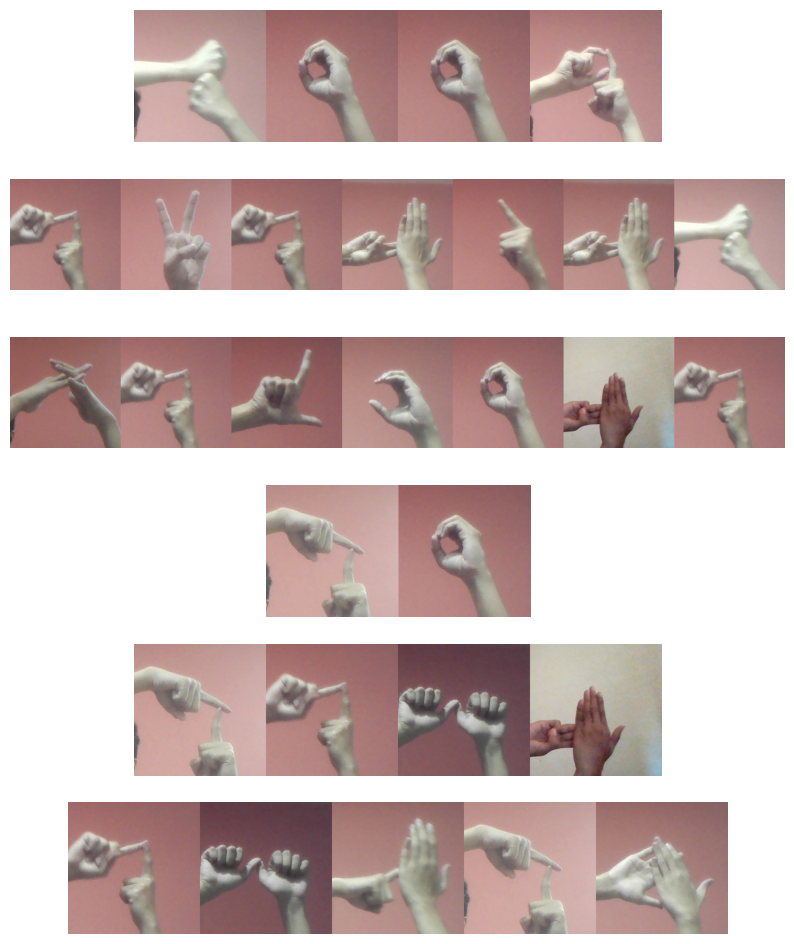

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


In [1]:
import tkinter as tk
from tkinter import filedialog, Text
from PIL import Image, ImageTk
import speech_recognition as sr
import pyttsx3
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('sign_language_model.h5')

# Initialize speech recognition and text-to-speech
recognizer = sr.Recognizer()
tts_engine = pyttsx3.init()

# Function to convert text to speech
def speak_text(text):
    tts_engine.say(text)
    tts_engine.runAndWait()

# Function to recognize speech
def recognize_speech():
    with sr.Microphone() as source:
        recognizer.adjust_for_ambient_noise(source, duration=0.2)
        print("Listening...")
        audio = recognizer.listen(source)
        try:
            text = recognizer.recognize_google(audio).lower()
            print("You said:", text)
            text_output.insert(tk.END, text + "\n")
            speak_text(text)
            display_gesture_images(text)
        except sr.RequestError as e:
            print(f"Could not request results: {e}")
        except sr.UnknownValueError:
            print("Unknown error occurred")

# Function to display gesture images in a collage using matplotlib
def display_gesture_images(text):
    words = text.split()
    fig, axes = plt.subplots(len(words), 1, figsize=(10, len(words) * 2))
    
    if len(words) == 1:
        axes = [axes]  # Ensure axes is always a list
    
    for ax, word in zip(axes, words):
        images = []
        for char in word:
            if char.isalnum():  # Check if the character is alphanumeric
                img_path = f'signs/{char.upper()}.jpg'  # Assuming gesture images are named as A.jpg, B.jpg, 0.jpg, 1.jpg, etc.
                try:
                    img = Image.open(img_path)
                    images.append(img)
                except FileNotFoundError:
                    print(f"Image for {char} not found.")
        
        if images:
            collage = np.hstack([np.array(img) for img in images])
            ax.imshow(collage)
            ax.axis('off')
    
    plt.show()

# Function to process dropped image
def process_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        img = Image.open(file_path).convert('L')
        img = img.resize((28, 28))
        img_array = np.array(img).reshape(1, 28, 28, 1) / 255.0
        prediction = model.predict(img_array)
        predicted_label = np.argmax(prediction)
        text_output.insert(tk.END, f"Predicted Gesture: {predicted_label}\n")
        speak_text(f"Predicted Gesture: {predicted_label}")

# Create the main window
root = tk.Tk()
root.title("Sign Language Translator")

# Create a frame for the text output
text_frame = tk.Frame(root)
text_frame.pack()

# Create a text widget for displaying output
text_output = Text(text_frame, height=10, width=50)
text_output.pack()

# Create buttons for speech recognition and image processing
speech_button = tk.Button(root, text="Speak", command=recognize_speech)
speech_button.pack()

image_button = tk.Button(root, text="Drop Image", command=process_image)
image_button.pack()

# Run the GUI loop
root.mainloop()
